# Document Embedding Evaluation

--- Last edited: 2024-09-26 ---

In [1]:
import collections
from datetime import date
import glob
import json
import os
from pathlib import Path
import pickle
import random
import re
import string
import sys
import time
import csv
import shutil
import requests
from tqdm.notebook import tqdm
import ast
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform
import mantel
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [33]:
dist1 = pd.read_csv("C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/analyses/modelling_lithist/ENG/doc2vec_adjacency_ENG.csv", index_col=0)
dist2 = pd.read_csv("C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/analyses/embedding_lithist/ENG/20240919_window=10texts_wordembedding_adjacency.csv", index_col=0)

In [34]:
common_cols = sorted(set(dist1.columns) & set(dist2.columns))

In [35]:
common_labels = sorted(set(dist1.index) & set(dist2.index))

# Subset and sort both DataFrames
df1_sorted = dist1.loc[common_labels, common_labels]
df2_sorted = dist2.loc[common_labels, common_labels]

In [36]:
dist1 = squareform(df1_sorted)
dist2 = squareform(df2_sorted)

In [37]:
result = mantel.test(dist1, dist2, perms=10000, method='pearson', tail='upper')

In [38]:
result

MantelResult(-0.015191455228255307, 0.6372, -0.3522150945795768)

In [39]:
canonisation_score = pd.read_csv('C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/data/scores/reception_scores/reception_scores_classes_ENG.csv', encoding='UTF-8')
canonisation_score = canonisation_score[canonisation_score['ID'].isin(common_labels)]

In [40]:
canonisation_texts = canonisation_score['ID']
canonisation_score = canonisation_score['canonisation_score']

In [12]:
diff_matrix = np.abs(df1_sorted - df2_sorted)

In [13]:
diff_matrix.to_csv("C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/analyses/comparing_systems/ENG/networks/diff_matrix.csv", index=True)

Pearson correlation: -0.19273948303311028
P-value: 0.00496243459298679


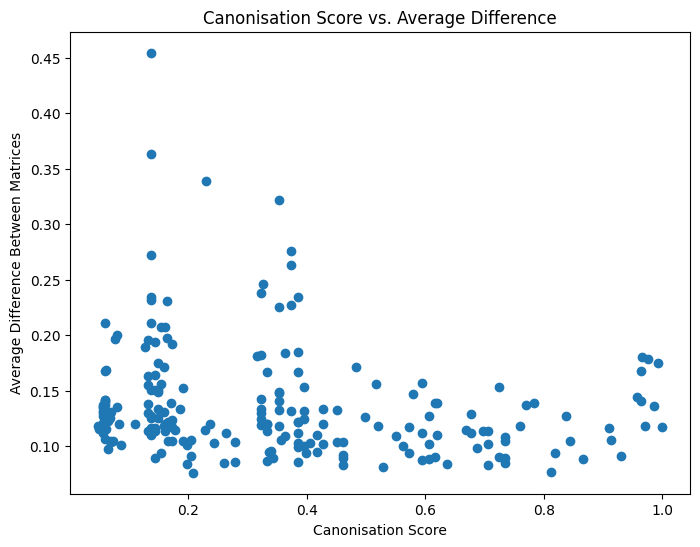

In [14]:
avg_differences = np.mean(diff_matrix, axis=1)  # Average difference for each text
correlation, p_value = pearsonr(canonisation_score, avg_differences)

print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")

# Step 6: Scatter plot to visualize the relationship between canonisation score and average difference
plt.figure(figsize=(8, 6))
plt.scatter(canonisation_score, avg_differences)
plt.xlabel("Canonisation Score")
plt.ylabel("Average Difference Between Matrices")
plt.title("Canonisation Score vs. Average Difference")
plt.show()

In [15]:
canonisation_score.index = common_labels

In [16]:
export_df = pd.DataFrame({
    'ID': avg_differences.index,
    'canonisation_score': canonisation_score,
    'avg_differences': avg_differences
})

In [17]:
# Export to CSV
export_df.to_csv("C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/analyses/comparing_systems/ENG/networks/canonisation_vs_diff.csv", index=False)

In [18]:
dist1 = pd.read_csv("C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/analyses/modelling_lithist/GER/doc2vec_adjacency_GER.csv", index_col=0)
dist2 = pd.read_csv("C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/analyses/embedding_lithist/GER/20240919_window=10texts_wordembedding_adjacency.csv", index_col=0)

In [19]:
common_cols = sorted(set(dist1.columns) & set(dist2.columns))

In [20]:
common_labels = sorted(set(dist1.index) & set(dist2.index))

# Subset and sort both DataFrames
df1_sorted = dist1.loc[common_labels, common_labels]
df2_sorted = dist2.loc[common_labels, common_labels]

In [21]:
dist1 = squareform(df1_sorted)
dist2 = squareform(df2_sorted)

In [22]:
result = mantel.test(dist1, dist2, perms=10000, method='pearson', tail='upper')

In [23]:
result

MantelResult(-0.043486823068054715, 0.7769, -0.7675806309432835)

In [24]:
canonisation_score = pd.read_csv('C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/data/scores/reception_scores/reception_scores_classes_GER.csv', encoding="UTF-8")
canonisation_score = canonisation_score[canonisation_score['ID'].isin(common_labels)]

In [25]:
canonisation_texts = canonisation_score['ID']
canonisation_score = canonisation_score['canonisation_score']

In [26]:
diff_matrix = np.abs(df1_sorted - df2_sorted)

In [28]:
diff_matrix.to_csv("C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/analyses/comparing_systems/GER/networks/diff_matrix.csv", index=True)

Pearson correlation: -0.25872234177848075
P-value: 0.005240276389437891


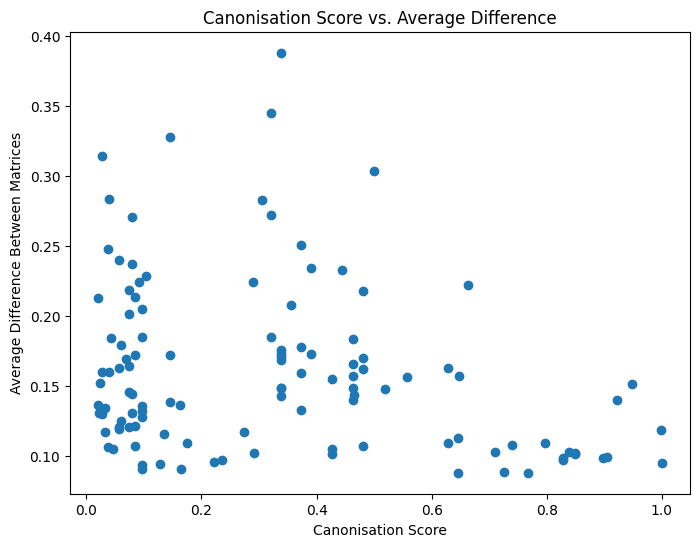

In [29]:
avg_differences = np.mean(diff_matrix, axis=1)  # Average difference for each text
correlation, p_value = pearsonr(canonisation_score, avg_differences)

print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))
plt.scatter(canonisation_score, avg_differences)
plt.xlabel("Canonisation Score")
plt.ylabel("Average Difference Between Matrices")
plt.title("Canonisation Score vs. Average Difference")
plt.show()

In [30]:
canonisation_score.index = common_labels

In [31]:
export_df = pd.DataFrame({
    'ID': avg_differences.index,
    'canonisation_score': canonisation_score,
    'avg_differences': avg_differences
})

In [32]:
# Export to CSV
export_df.to_csv("C:/Users/Brottrager/Documents/Diss/RelatingTheUnread/analyses/comparing_systems/GER/networks/canonisation_vs_diff.csv", index=False)